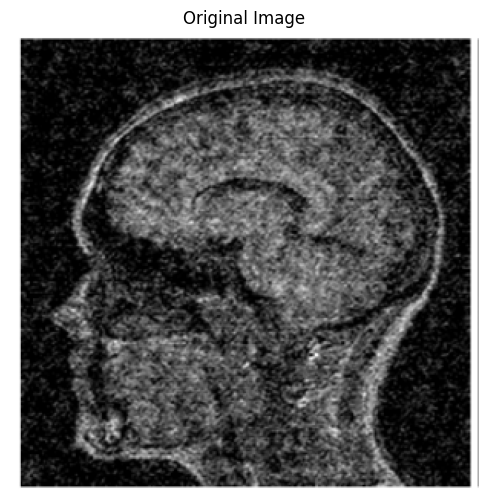

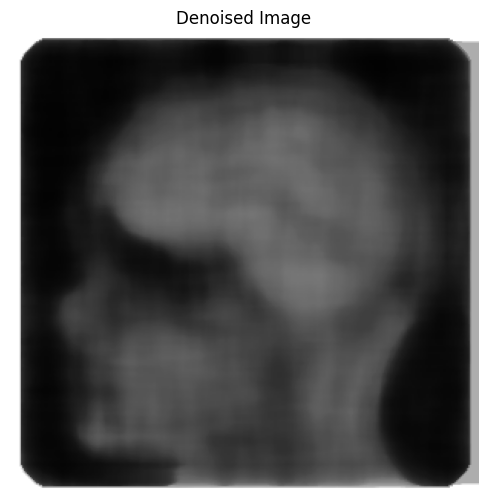

Denoised image saved to /Users/user/Downloads/median.png
PSNR Score: 28.710748321807138 dB


In [7]:
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Global Variables
MAX_KERNEL_LENGTH = 31
src = None
dst = None

def main(argv):
    # Load the source image
    global src
    image_path = '/Users/user/Downloads/noisy.png'
    src = cv.imread(image_path)
    if src is None:
        print(f'Error opening image at path: {image_path}')
        return -1
    
    # Display the original image
    display_image('Original Image', src)
    
    # Applying Median blur
    dst = np.copy(src)
    for i in range(1, MAX_KERNEL_LENGTH, 2):
        dst = cv.medianBlur(src, i)
    
    # Display the denoised image
    display_image('Denoised Image', dst)

    # Save the denoised image to a file
    output_path = '/Users/user/Downloads/median.png'
    cv.imwrite(output_path, dst)
    print("Denoised image saved to " + output_path)

    # Calculate PSNR
    clear = '/Users/user/Downloads/clear.png'
    median = '/Users/user/Downloads/median.png'
    clear_image = cv.imread(clear)
    processed_image = cv.imread(median)
    if clear_image is None:
        print(f'Error opening image at path: {clear}')
        return -1
    if processed_image is None:
        print(f'Error opening image at path: {median}')
        return -1
    
    psnr_score = calculate_psnr(clear_image, processed_image)
    print(f"PSNR Score: {psnr_score} dB")

def display_image(title, image):
    plt.figure(figsize=(8, 6))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    max_pixel_value = 255.0  # Assuming 8-bit images
    psnr = 10 * np.log10((max_pixel_value ** 2) / mse)
    return psnr

if __name__ == "__main__":
    main(sys.argv[1:])
